In [1]:
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#read csv
cols = ['CRIM', "ZN", "INDUS", "CHAS", "NOX", "RM" , "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('housing.csv', names=cols, header=None)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Dropping NA values

In [3]:
df = df.dropna()

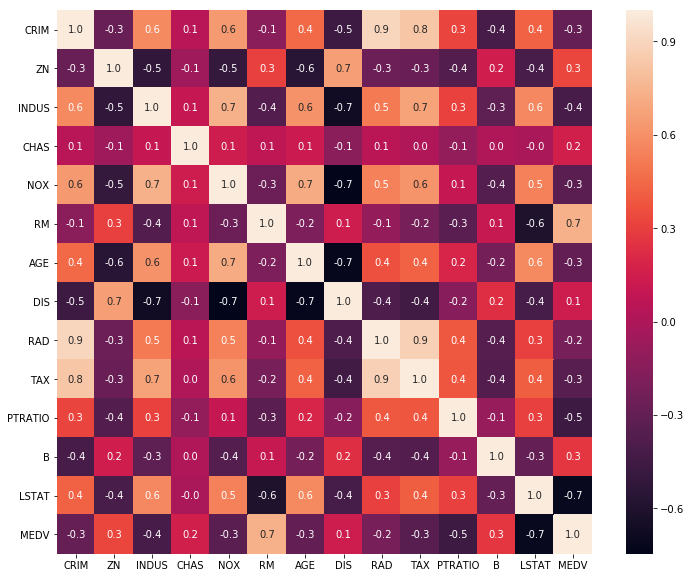

In [4]:
plt.figure(figsize=(12,10))
sb.heatmap(df.corr(),annot=True,fmt='.1f')

### RM and LSTAT have good correlation with MEDV. INDUS, NOX and AGE have good correlation with DIS

### Plot a scatter plot of all attributes against MEDV to observe trends and select relevant features

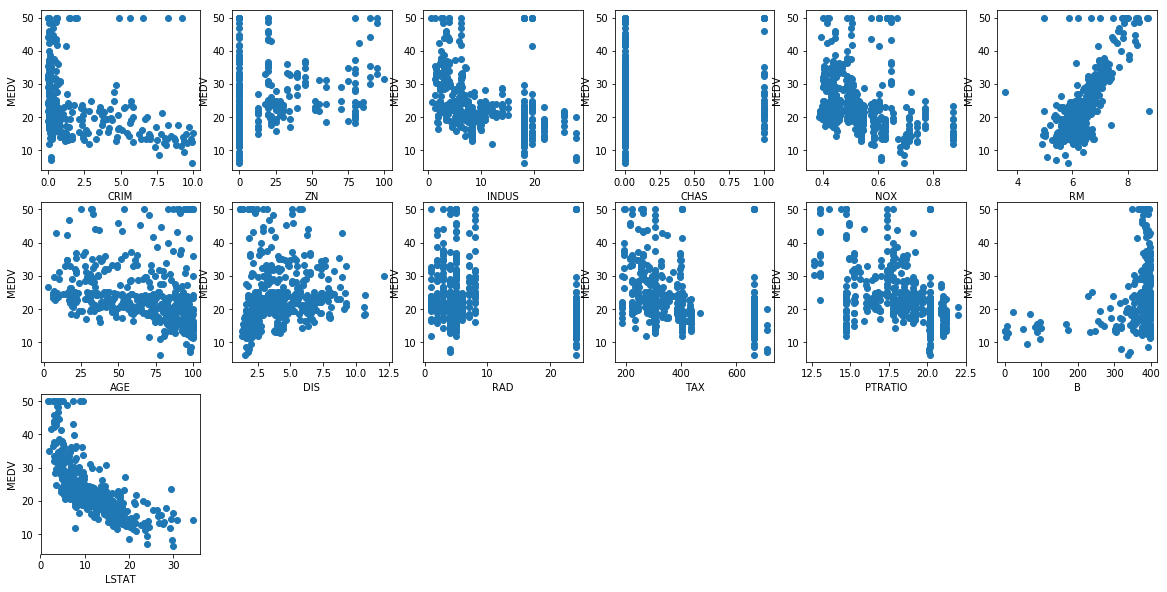

In [5]:
plt.figure(figsize=(20,10))
for i in range(0,13):
    plt.subplot(3,6,i+1)
    plt.xlabel(list(df.columns.values)[i])
    plt.ylabel('MEDV')
    plt.scatter(df.iloc[:,i],df.iloc[:,-1])


### Consider following features to train model

In [6]:
cols_to_consider = ['CRIM','INDUS','NOX','RM','AGE','DIS','PTRATIO','LSTAT']

### Train model using multivariate regression and calculate R squared score of model

In [7]:
from sklearn.model_selection import train_test_split as tts 
x_train, x_test, y_train, y_test = tts(df[cols_to_consider],df['MEDV'],test_size=0.2,random_state=30)

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(x_train, y_train)
obtained_y_test = lm.predict(x_test)
print("R squared score:",lm.score(x_test,y_test))

R squared score: 0.6934959291021335


### Calculate MSE

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error (y_true = y_test, y_pred = obtained_y_test)
print("Mean squared error:", mse)

Mean squared error: 22.200449250679913


### Plot actual MEDV values vs predicted MEDV values

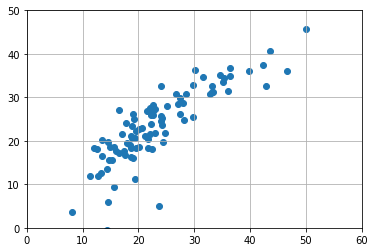

In [10]:
plt.scatter(y_test,obtained_y_test)
plt.axis([0,60,0,50])
plt.grid(True)